# Исследование данных о российском кинопрокате



**Описание проекта**

Заказчик этого исследования — Министерство культуры Российской Федерации.
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.
Доступны данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.


**Цель исследования**

* Посмотреть, сколько фильмов выходило в прокат каждый год. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

* Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

* Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.

* Исследовать фильмы, которые получили государственную поддержку.
Поиск интересных закономерностей в данных. Посмотреть, сколько выделяют средств на поддержку кино. Проверить, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**Ход исследования**  

Исследование содержит следующие этапы:
1. Изучение данных из файлов и их объединение.  
2. Предобработка данных.  
    * 2.1 Анализ и обработка пропусков
    * 2.2 Обработка типов данных
    * 2.3 Обработка дубликатов  
    * 2.4 Обработка категориальных значений
    * 2.5 Проверка количественных значений
    * 2.6 Добавление новых столбцов
3. Исследовательский анализ данных.
4. Исследование фильмов, которые получили государственную поддержку.
5. Общий вывод.

### Открытие файлов с данными и объединие их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
# чтение файла mkrf_movies.csv и сохранение в переменной data
if os.path.exists('/datasets/mkrf_movies.csv'):
    data = pd.read_csv('/datasets/mkrf_movies.csv', sep = ',')
else:
    data = pd.read_csv('mkrf_movies.csv', sep = ',')

In [4]:
# просмотр первых пяти строк таблицы
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
# чтение файла mkrf_shows.csv и сохранение в переменной data_1
if os.path.exists('/datasets/mkrf_shows.csv'):
    data_1 = pd.read_csv('/datasets/mkrf_shows.csv', sep = ',')
else:
    data_1 = pd.read_csv('mkrf_shows.csv', sep = ',')

In [6]:
# просмотр первых пяти строк таблицы второй таблицы
data_1.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [7]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В таблице 15 столбцов.

Согласно документации к данным:

* title — название фильма;
* puNumber — номер прокатного удостоверения;
* show_start_date — дата премьеры фильма;
* type — тип фильма;
* film_studio — студия-производитель;
* production_country — страна-производитель;
* director — режиссёр;
* producer — продюсер;
* age_restriction — возрастная категория;
* refundable_support — объём возвратных средств государственной поддержки;
* nonrefundable_support — объём невозвратных средств государственной поддержки;
* financing_source — источник государственного финансирования;
* budget — общий бюджет фильма;
* ratings — рейтинг фильма на КиноПоиске;
* genres — жанр фильма.

In [8]:
# получение общей информации о данных в таблице data_1
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В таблице 2 столбца.

Согласно документации к данным:

* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

Для объединения двух таблиц, нам требуется в столбце 'puNumber', по которому мы будем объединять,
заменить тип данных в первой таблице на int, чтобы он соответствовал типу данных второй таблицы. Сделать это не получилось, так как код выдал ошибку, что в столбце есть слово "нет". 

In [9]:
#убедимся, что в столбце puNumber действительно есть "нет"
data_no = data.query('puNumber=="нет"')
data_no

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# заменим "нет" на 0.
data.loc[data['puNumber'] == 'нет', 'puNumber'] = 0

In [11]:
# поменяем тип данных на целочисленный
data['puNumber'] = data['puNumber'].astype('int') 

In [12]:
# объединим две таблицы по столбцу puNumber, индексы таблицы data включим в итоговую таблицу
df = data.merge(data_1, on='puNumber', how='left')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [13]:
# переименуем столбцец puNumber, приведем его к нижнему регистру
df = df.rename(columns={'puNumber': 'pu_number' })

In [14]:
# убедимся, что все значения добавились к новой таблице и столбец pu_number переименовался
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

###  Предобработка данных

####  Анализ и обработка пропусков в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [15]:
# определеним количество пропусков в процентах
(df.isna().mean().round(4))*100

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
film_studio               0.24
production_country        0.03
director                  0.12
producer                  7.59
age_restriction           0.00
refundable_support       95.57
nonrefundable_support    95.57
budget                   95.57
financing_source         95.57
ratings                  12.92
genres                   13.04
box_office               57.81
dtype: float64

In [16]:
#поиск пропусков методом isna() в столбце producer
df[df['producer'].isna()].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN


In [17]:
#поиск пропусков методом isna() в столбце nonrefundable_support
df.query('nonrefundable_support.isna()').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [18]:
#поиск пропусков методом isna() в столбце ratings
df.query('ratings.isna()').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# сгрупируем новую таблицу по столбцу age_restriction и посчитаем кол-во проставленного рейтинга и жанров в столбцах ratings и genres
df_qroup = df.groupby('age_restriction')['ratings', 'genres'].count()
df_qroup

,ratings,genres
age_restriction,,
«0+» - для любой зрительской аудитории,468,468
«12+» - для детей старше 12 лет,1348,1348
«16+» - для детей старше 16 лет,2663,2659
«18+» - запрещено для детей,1512,1507
«6+» - для детей старше 6 лет,528,528


In [20]:
#посмотрим уникальные значения столбца box_office
df['box_office'].value_counts().sort_values()

26069577.20     1
54265.00        1
966539.00       1
434117.00       1
12173513.01     1
               ..
250.00          8
360.00          9
300.00         12
200.00         13
0.00           24
Name: box_office, Length: 2938, dtype: int64

##### Вывод

В столбах **film_studio**, **production_country** и **director**, в сумме пропуски не превышаю 0,5%, поэтому просто удалим пропущенные значения в данных столбах.

В столбце **producer** пропуски составляют, более 5%, просто так мы их удалить не можем, это повлечет к потере других важных данных. После того, как мы нашли пропуски в данном столбце методом isna, можно проследить то, что пропуски стоят там где страна - производитель СССР. В нашем искусстве слово «продюсер» появилось относительно недавно. Еще лет двадцать назад в нашем кино, например, существовали просто директора картины. Скорее всего этим и объясняется наличие пропусков в данном столбце. Для дальнейшего исследования, столбец, не играет большую роль, просто оставим пропуски так как есть.

Очень большой процент пропусков в столбах **refundable_support**, **nonrefundable_support** и **budget** , изучив пропущенные значения, видно, что пропуски стоят напротив фильмов либо зарубежных, либо снятых в СССР. Так как господдержка дает деньги только Российским фильмам, а в СССР воообще кино было государственным и полностью выделялись деньги на него, а не частично поддерживались. Вполне объяснимы данные пропуски. Поэтому мы можем заменить NaN на 0, тем самым показав, что данные фильмы не получали господдержки. 

В столбце  **financing_source** 95,6% источников финансирования пропущенно. Проведя выше анализ пропусков столбцах nonrefundable_support и budget, делаем аналогичный вывод, что фильмы выпущенные в СССР и заграницей, не попадают в категорию, в которой можно получить господдержку. Исходя из этого, данные пропуски оставим так как есть. 

В столбце **ratings** пропусков встретилось 12,9%, это достаточно много, удалить не можем. Но заметив тенденцию, что пропуски в основном стоят напротив возрастной категории 0+ и 6+. Посмотрев более детально на эти 2 столбца и убедившись в этом, можно сделать вывод, что либо дети не проставляют рейтинг после просмотра, так как им это не интересно, либо взрослые не считают нужным ставить рейтинг. То есть можно заменить NaN на 0. Показав тем самым отсутствие рейтинга.

В столбце **genres** пропусков 13%. Возникло предположение, что раз пропуски встречаются почти в тех же строках, что и пропуски в ratings на против возрастной категории 0+ и 6+. То возможно, это жанр мультфильм. Тогда изменим пропуск в жанре на мультфильм, в тех строках, где возрастная категория 0+ и 6+. Остальные строки заменим на "unknown".

Пропусков в столбце **box_office**, очень много 57,8%. Далеко не все фильмы выходят в прокат, скорее всего такой большой процент пропусков оправдан. Мы с ними ничего делат не будем оставим как есть.

In [21]:
# От строк с пропусками в столбцах 'film_studio', 'production_country' и 'director' избавимся методом dropna(). 
df = df.dropna(subset=['film_studio', 'production_country', 'director']) 

In [22]:
#удалим знак «% », а затем используем astype для преобразования типа данных в число в столбце с рейтингом
df['ratings'] = df['ratings'].str.replace('%','').astype(np.float64)

In [23]:
#заполним отсутствующие значения столбцов 'refundable_support', 'nonrefundable_support', 'budget' и 'ratings' нолем.
columns_to_replace = ['refundable_support', 'nonrefundable_support', 'budget', 'ratings']
for column in columns_to_replace: df[column] = df[column].fillna(0)

In [24]:
# создадим функцию, которая пробежится по всем значениям столбца age_restriction и выберет в нем возрастные ограничения 
# и преобразуем эти возрастные ограничения в новом столбце, в котором они будут ввиде целого числа.
def age(row):
    age_restriction = row['age_restriction']
    if '0' in age_restriction:
        return 0
    
    if '16 лет' in age_restriction:
        return  16
    
    if '12' in age_restriction:
        return  12
    
    if 'старше 6 лет' in age_restriction:
        return 6 
    if '18' in age_restriction:
        return 18
#присоединяем к таблице новый столбец с категориями по возрасту ввиде целого числа
df['age_group'] = df.apply(age, axis=1)        
df.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
488,Папаши 2,121014316,2016-05-30T12:00:00.000Z,Художественный,"Гомон, Каре Продюксьон, ТФ1",Франция,Мартин Валенте,Фабрис Гольдштейн,«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,8.5,"драма,криминал",NaN,16
709,"Корпорация ""Святые моторы""",121023912,2012-09-25T12:00:00.000Z,Художественный,"Программ Медиа де ля Коммунеле Еуропен, Уалд Б...",Франция - Германия,Лео Каракс,"Мартин Мариньяк, Альберт Превост, Морис Тиншант",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.6,"фэнтези,драма",41510.0,18
1602,Лесной патруль,124001114,2014-04-17T12:00:00.000Z,Анимационный,Неофилм,Норвегия,Расмус А.Сивертсен,"Ааге Ааберге, Ливе Бонневье",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,NaN,5.6,"мультфильм,приключения,семейный",671713.0,0
2638,Золотая лихорадка. Безумие в Гайане,112000315,2015-07-30T12:00:00.000Z,Документальный,"ООО ""ДиджиталЛаб""",Россия,В.Рощин,"В.Рощин, Ю.Коваленко",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,4.8,"драма,криминал,приключения",NaN,16
1737,Как поймать перо Жар-Птицы,114000513,2013-10-11T12:00:00.000Z,Художественный,"ООО ""Визарт Фильм"", ООО ""Кинокомпания ""СТВ""",Россия,"В.Плотников, Г.Гитис","С.Сельянов, А.Лигай, С.Рапопорт, Ю.Москвин",«0+» - для любой зрительской аудитории,0.0,0.0,0.0,NaN,5.2,"мультфильм,фэнтези",96846.0,0


In [25]:
# заменим те пропуски в столбце genres, которые находятся на против возрастной категории 0+
df.loc[(df['age_group'] == 0) & (df['genres'].isna()), 'genres'] = 'мультфильм'

In [26]:
# заменим те пропуски в столбце genres, которые находятся на против возрастной категории 6+
df.loc[(df['age_group'] == 6) & (df['genres'].isna()), 'genres'] = 'мультфильм'

In [27]:
# заменим пропуски в столбцах 'genres', 'producer', 'financing_source' на 'unknown'
df[['genres', 'producer', 'financing_source']] = df[['genres', 'producer', 'financing_source']].fillna('unknown')
df[['genres', 'producer', 'financing_source']].isna().sum()

genres              0
producer            0
financing_source    0
dtype: int64

In [28]:
# определеним количество пропусков в процентах
(df.isna().mean().round(4))*100

title                     0.0
pu_number                 0.0
show_start_date           0.0
type                      0.0
film_studio               0.0
production_country        0.0
director                  0.0
producer                  0.0
age_restriction           0.0
refundable_support        0.0
nonrefundable_support     0.0
budget                    0.0
financing_source          0.0
ratings                   0.0
genres                    0.0
box_office               57.7
age_group                 0.0
dtype: float64

####  Проверка типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Необходимо заменить тип данных в следующих столбцах:
* show_start_date - на тип **datetime**
* refundable_support, nonrefundable_support и budget - на тип **int**, так же для удобства восприятия переведем рубли в тыс.руб.
* ratings - на тип **float**
* box_office - тип оставим как есть, но переведем рубли в тыс.руб.


In [29]:
# заменяем тип данных на в столбце 'first_day_exposition' 
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d %H:%M:%S')

In [30]:
# для удобства просмотра данных меняем тип данных на целочисленный в столбцах 
columns = ['refundable_support', 'nonrefundable_support', 'budget']
for column in columns: df[column] = df[column].astype('int') 

In [31]:
#проверим изменился ли тип данных на нужный
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7459 non-null   object             
 1   pu_number              7459 non-null   int32              
 2   show_start_date        7459 non-null   datetime64[ns, UTC]
 3   type                   7459 non-null   object             
 4   film_studio            7459 non-null   object             
 5   production_country     7459 non-null   object             
 6   director               7459 non-null   object             
 7   producer               7459 non-null   object             
 8   age_restriction        7459 non-null   object             
 9   refundable_support     7459 non-null   int32              
 10  nonrefundable_support  7459 non-null   int32              
 11  budget                 7459 non-null   int32            

In [32]:
# переведем столбцы refundable_support, nonrefundable_support, budget, box_office из рублей в тыс.руб.
columns_1 = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office'] 
for column in columns_1:
    df[column] = (df[column]/1000)

In [33]:
df.sample(5, random_state=42)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
5685,"Три билборда на границе Эббинга, Миссури",121029417,2018-02-01 12:00:00+00:00,Художественный,"Блюпринт Пикчерз, Фокс Сёрчлайт",Великобритания - США,Мартин МакДона,"Грэм Бродбент, Мартин МакДона, Питер Чернин",«18+» - запрещено для детей,0.0,0.0,0.000,unknown,8.2,"драма,криминал",187196.92735,18
2180,Волки / Wolves,221034514,2014-09-09 12:00:00+00:00,Художественный,Копперхед Интертейнмент,Франция - США,Дэвид Хэйтер,"Бенедикт Карвер, Сара Фрюдман, Стивен Хобан",«16+» - для детей старше 16 лет,0.0,0.0,0.000,unknown,4.6,"фэнтези,боевик,ужасы",NaN,16
1143,Обитель зла: Возмездие,121019712,2012-09-05 12:00:00+00:00,Художественный,"Дэвис Филмз, Импакт Пикчерз (Эр И 5), Констант...",США,Пол У.С.Андерсон,"Пол У.С.Андерсон, Джереми Болт, Дон Кармоди",«18+» - запрещено для детей,0.0,0.0,0.000,unknown,5.3,"ужасы,боевик,фантастика",NaN,18
6677,Город грехов,121000219,2019-03-02 12:00:00+00:00,Художественный,"Дименшн Филмз, Трублемейкер Студиос",США,"Фрэнк Миллер, Роберт Родригес, Квентин Тарантино","Элизабет Авеллан, Боб Вайнштейн, Харви Вайнште...",«18+» - запрещено для детей,0.0,0.0,0.000,unknown,7.9,"боевик,триллер,криминал",NaN,18
3462,Защитники,111000717,2017-01-24 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз"", ООО ""РЕНОВАЦИО интертейнмент""",Россия,С.Андреасян,"С.Андреасян, Г.Андреасян, В.Поляков, А.Рязанцев",«12+» - для детей старше 12 лет,50000.0,150000.0,323232.109,Фонд кино,3.0,"фантастика,фэнтези,боевик",262040.25400,12


####  Обработка дубликатов в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [34]:
#посмотрим с помощью метода duplicated(), есть ли явные дубликаты в таблице с данными
df.duplicated().sum()

0

In [35]:
#выведем все уникальные значения столбца 'title'
df['title'].value_counts()

День святого Валентина_                  5
Химера                                   4
Кошки против собак: Месть Китти Галор    4
Там, где живут чудовища                  4
Робин Гуд (Robin Hood)                   4
                                        ..
Уиджи. Проклятие доски дьявола           1
Лариса                                   1
Сахар                                    1
МУЛЬТ в кино. Выпуск № 71                1
Неуловимый Люк                           1
Name: title, Length: 6746, dtype: int64

In [36]:
#посмотрим на фильм "День святого Валентина_" встречающийся 5 раз.
df.query('title=="День святого Валентина_"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",NaN,16
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",NaN,16
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",NaN,16
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",NaN,16
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,6.7,"мелодрама,комедия",NaN,16


In [37]:
#выведем все уникальные значения столбца 'pu_number'
df['pu_number'].value_counts()

221054410    2
221154310    2
114001919    1
221025616    1
221136210    1
            ..
112025418    1
111008518    1
121000711    1
111012616    1
0            1
Name: pu_number, Length: 7457, dtype: int64

In [38]:
#посмотрим на фильм с повторяющимся номером прокатного удостоверения
df.query('pu_number == 221054410')


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.4,"комедия,криминал",NaN,16
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,unknown,6.8,"комедия,криминал",NaN,12


In [39]:
#посмотрим на фильм с повторяющимся номером прокатного удостоверения
df.query('pu_number == 221154310')


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.0,"мелодрама,комедия",NaN,16
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.6,"драма,мелодрама,история",NaN,16


##### Вывод

* Явных дубликатов нет.

* Есть повторяющиеся названия фильмов, но рассмотрев повнимательней, можно предположить, что это не дубликаты, так как они имеют разные номера прокатного удостоверения и даты премьеры фильма.

* Фильм "Анализируй это!" и "Анализируй то!" это неявный дубликат, совпадает все кроме названия, директора и рейтинга. Зайдя на кинопоиск, обнаружила действительно эти два фильма. Вероятно, что была допущена ошибка, либо техническая, либо сыграл человеческий фактор и произошла выгрузка двух одинаковых фильмов, но с разными написаниями. "Анализируй это!" поставили оценки 41 тыс.чел, а ""Анализируй то!" - 21тыс.чел. Избавимся от дубликата, удалим тот, что просмотрела меньше народу, а значит и рейтинг менее точный.

* Если рассмотреть фильмы "Как жениться и остаться холостым" и "Иоанна - женщина на папском престоле", то можно точно убедиться, что это соверщшенно два разных фильма. Произошла точно какая-то ошибка, поэтому они получили один номер прокатного удостоверения. 

In [40]:
# удалим строку под индексом 5068 с неявным дубликатом
df = df.drop(index=[5068])

In [41]:
# убедимся, что строка удалилась
df.query('pu_number == 221054410')


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,7.4,"комедия,криминал",NaN,16


####  Изучение категориальных значений

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [42]:
# посмотрим все уникальные значения в столбце type
df['type'].value_counts()

Художественный                4513
 Художественный               1384
Анимационный                   828
Прочие                         401
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [43]:
# уберем пробелы перед значениями в столбце type и перезапишем столбец
df['type'] = df['type'].str.strip()

In [44]:
# проверим, убрались ли пробелы
df['type'].value_counts()

Художественный                5897
Анимационный                   829
Прочие                         401
Документальный                 280
Научно-популярный               50
Музыкально-развлекательный       1
Name: type, dtype: int64

In [45]:
# посмотрим все уникальные значения в столбце film_studio
df['film_studio'].value_counts().head(15)

Киностудия "Мосфильм"                                           341
ООО "Мульт в кино"                                               57
Анимаккорд Лтд                                                   23
ООО "Мульт в кино"                                               18
ФГУП "ТПО "Киностудия "Союзмультфильм"                           16
ООО "ТаББаК"                                                     15
ООО "Студия анимационного кино "Мельница"                        14
Опус Арте                                                        14
Р А И Синема                                                     14
Пиксар Анимейшн Студиос, Уолт Дисней Пикчерз                     13
ООО "Кинокомпания "СТВ"                                          13
ЗАО "Аэроплан"                                                   12
Уолт Дисней Пикчерз                                              11
Уорнер Бразерс                                                   10
ОАО "ТПО "Санкт-Петербургская студия документаль

In [46]:
# посмотрим все уникальные значения в столбце production_country
df['production_country'].value_counts().head(15)

США                     2170
Россия                  1802
СССР                     347
Франция                  301
Великобритания           253
Италия                   129
Германия                 110
США - Великобритания      88
Япония                    77
Испания                   74
Франция - Бельгия         55
Канада                    52
Австралия                 50
США - Канада              44
Великобритания - США      40
Name: production_country, dtype: int64

In [47]:
# посмотрим все уникальные значения в столбце director
df['director'].value_counts().head(15)

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Клинт Иствуд        13
Вуди Аллен          13
Питер Джексон       13
Кевин Смит          12
О.Семёнова          12
Стивен Спилберг     12
Дэвид Финчер        12
Люк Бессон          12
П.Смирнов           11
Кристофер Нолан     11
Name: director, dtype: int64

In [48]:
# посмотрим все уникальные значения в столбце producer
df['producer'].value_counts().head(15)

unknown                                          564
П.Смирнов                                         67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина     28
С.Сельянов                                        18
Д.Ловейко, О.Кузовков                             17
Кевин Фейги                                       11
Тони Майерс                                       11
А.Тельнов                                         11
Джерри Брукхаймер                                 11
Э.Пичугин                                          9
Н.Мокрицкая                                        9
ООО "Продюсерский центр ЕРАЛАШ"                    9
С.Говорухин, Е.Маскина                             9
С.Сельянов, А.Боярский                             9
Б.Машковцев, С.Струсовский                         8
Name: producer, dtype: int64

In [49]:
# посмотрим все уникальные значения в столбце title
df['age_restriction'].value_counts().head(15)

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1601
«12+» - для детей старше 12 лет           1583
«0+» - для любой зрительской аудитории     803
«6+» - для детей старше 6 лет              623
Name: age_restriction, dtype: int64

In [50]:
# посмотрим все уникальные значения в столбце financing_source
df['financing_source'].value_counts().head(15)

unknown                             7126
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

In [51]:
# посмотрим все уникальные значения в столбце genres
df['genres'].value_counts().head(15)

unknown                           522
драма                             476
мультфильм                        457
комедия                           351
мелодрама,комедия                 222
драма,мелодрама,комедия           189
драма,мелодрама                   183
драма,комедия                     158
триллер,драма,криминал            141
боевик,триллер,драма              140
фантастика,боевик,триллер          87
документальный                     84
мультфильм,комедия,приключения     80
ужасы,триллер,детектив             78
ужасы,триллер                      78
Name: genres, dtype: int64

##### Вывод

С помощью метода value_counts(), были проверены все столбцы с категориальными значениями. 

Методом str.strip(), убрали пробелы, встречающиеся в начале столбца **type**.

В столбцах (**'film_studio', 'production_country', 'producer', 'financing_source', 'genres'**), где хранятся списки, выделим первые значения и добавим их в отдельные столбцы. Сделаем это чуть ниже в п.2.6

####  Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [52]:
# посмотрим какие значения встречаются в столбце с рейтингом
df['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  0. ,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

##### Вывод

Рейтинг взят с сайта кинопоиск, зайдя на него, стало понятно, что рейтинг считается по десятибальной шкале. Значения больше 10 скорее всего являются опечаткой. Исправим столбец, там где рейтинг больше 10, мы значение поделим на 10, тем самым приведем его к десятибальной шале.

In [53]:
# заменим значения в столбце рейтинг, которые больше 10
df.loc[df['ratings'] >10, 'ratings'] = (df['ratings']/10)

In [54]:
# посмотрим изменился ли рейтинг
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [55]:
# проверим, есть ли фильмы где бюджет меньше гос. поддержки
df.query('budget < (nonrefundable_support + refundable_support)').tail(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group
5806,Два хвоста,114001018,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,10000.0,60000.000,0.000,Фонд кино,5.0,"мультфильм,детский",106514.30103,6
6008,Принцесса и дракон,114003018,2018-08-23 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,40000.0,40000.000,0.000,Фонд кино,5.2,"мультфильм,фэнтези,детский",83366.32866,6
6323,Баба Яга,114006518,2018-11-08 12:00:00+00:00,Анимационный,"ООО ""Арт Пикчерс Студия""",Россия,В.Саков,"ООО ""Арт Пикчерс Студия"", ООО ""КРИЭЙТИВ АНИМЭЙ...",«6+» - для детей старше 6 лет,0.0,138969.465,0.000,Фонд кино,0.0,мультфильм,1334.69940,6
6823,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000.0,120000.000,0.000,Фонд кино,6.2,"мультфильм,комедия,приключения",147606.82651,6
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000.0,90000.000,-2147483.648,Фонд кино,5.8,"приключения,фэнтези",333597.05959,6


In [56]:
#посчитаем сколько таких фильмов
len(df.query('budget < (nonrefundable_support + refundable_support)'))

18

##### Вывод

По срезу таблицы можно увидеть: 

Есть значения в столбцах с гос. поддержкой превышаюший общий бюджет фильма. Возможно произошла ошибка при выгрузке данных, об этом нужно сказать коллегам, кто отвечает за выгрузку. Так как количество таких значений очень мало, не будем производить долгие расчеты для более точного вычисления и заменим бюджет в тех строках, где он меньше гос.поддержки на сумму столбцов nonrefundable_support и refundable_support.

In [57]:
# заменим строки где бюджет меньше гос. поддержки на сумму значений столбцов nonrefundable_support и refundable_support
df.loc[df['budget'] < (df['nonrefundable_support'] + df['refundable_support']), 'budget']  = (df['nonrefundable_support'] + df['refundable_support'])

In [58]:
#проверим остались ли строки где бюджет меньше
df.query('budget < (nonrefundable_support + refundable_support)')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group


####  Добавление новых столбцов





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [59]:
# добавим в таблицу: год публикации объявления
df['year_rental'] = df['show_start_date'].dt.year

In [60]:
df.sample(3, random_state=50) 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,age_group,year_rental
5239,Голуби при потоках вод,111010411,2011-12-22 12:00:00+00:00,Художественный,"ООО ""ВАЛДАЙ""",Россия,И.Замалиев (псевдоним Э.Бартенев),С.Кучмаева,«16+» - для детей старше 16 лет,0.0,0.0,0.0,unknown,0.0,unknown,NaN,16,2011
5544,Джунгли,121022517,2017-11-02 12:00:00+00:00,Художественный,"Баббер Филмз, Катинг Эдж Груп, Скрин Австралиа...",Австралия - Колумбия,Грег МакЛин,Тодд Фелмэн,«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.8,"триллер,драма,приключения",45101.635,18,2017
2271,Как меня зовут.,111014814,2014-10-27 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова"", ООО...",Россия,Н.Сайфуллаева,"И.Толстунов, С.Козлов, С.Корнихин",«18+» - запрещено для детей,0.0,0.0,0.0,unknown,6.1,драма,180.108,18,2014


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [61]:
#Создадим столбец: с именем и фамилией главного режиссёра при помощи функции
def director_one(row):

    director = row['director']
      
    return director.split(',')[0] 

df['director_one'] = df.apply(director_one, axis=1)

In [62]:
#Создадим столбец: с основным жанром фильма при помощи функции
def genres_one(row):

    genres = row['genres']
      
    return genres.split(',')[0] 

df['genres_one'] = df.apply(genres_one, axis=1)

In [63]:
#Создадим столбец, куда войдет только первое значение из столбца студия-производитель, при помощи функции
def film_studio_one(row):

    film_studio = row['film_studio']
      
    return film_studio.split(',')[0] 

df['film_studio_one'] = df.apply(film_studio_one, axis=1)

In [64]:
#Создадим столбец, куда войдет только первое значение из столбца страна-производитель, при помощи функции
def production_country_one(row):

    production_country = row['production_country']
      
    return production_country.split('-')[0] 

df['production_country_one'] = df.apply(production_country_one, axis=1)

In [65]:
#Создадим столбец, куда войдет только первое значение из столбца продюссер, при помощи функции
def producer_one(row):

    producer = row['producer']
      
    return producer.split(',')[0] 

df['producer_one'] = df.apply(producer_one, axis=1)

In [66]:
#Создадим столбец, куда войдет только первое значение из столбца источник финансирования, при помощи функции
def financing_source_one(row):

    financing_source = row['financing_source']
      
    return financing_source.split(',')[0] 

df['financing_source_one'] = df.apply(financing_source_one, axis=1)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [67]:
#Создадим столбец: с долей в процентах гос. поддержки от общего бюджета
def ratio_support(row):
   
    nonrefundable_support = row['nonrefundable_support']
    refundable_support = row['refundable_support']
    budget = row['budget']  
    
    if budget != 0:
        return int(((nonrefundable_support+refundable_support) / budget)*100) 
    else:
        return 0
df['ratio_support'] = df.apply(ratio_support, axis=1)

In [68]:
df.sample(5, random_state=42)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,box_office,age_group,year_rental,director_one,genres_one,film_studio_one,production_country_one,producer_one,financing_source_one,ratio_support
5685,"Три билборда на границе Эббинга, Миссури",121029417,2018-02-01 12:00:00+00:00,Художественный,"Блюпринт Пикчерз, Фокс Сёрчлайт",Великобритания - США,Мартин МакДона,"Грэм Бродбент, Мартин МакДона, Питер Чернин",«18+» - запрещено для детей,0.0,...,187196.92735,18,2018,Мартин МакДона,драма,Блюпринт Пикчерз,Великобритания,Грэм Бродбент,unknown,0
2180,Волки / Wolves,221034514,2014-09-09 12:00:00+00:00,Художественный,Копперхед Интертейнмент,Франция - США,Дэвид Хэйтер,"Бенедикт Карвер, Сара Фрюдман, Стивен Хобан",«16+» - для детей старше 16 лет,0.0,...,NaN,16,2014,Дэвид Хэйтер,фэнтези,Копперхед Интертейнмент,Франция,Бенедикт Карвер,unknown,0
1143,Обитель зла: Возмездие,121019712,2012-09-05 12:00:00+00:00,Художественный,"Дэвис Филмз, Импакт Пикчерз (Эр И 5), Констант...",США,Пол У.С.Андерсон,"Пол У.С.Андерсон, Джереми Болт, Дон Кармоди",«18+» - запрещено для детей,0.0,...,NaN,18,2012,Пол У.С.Андерсон,ужасы,Дэвис Филмз,США,Пол У.С.Андерсон,unknown,0
6677,Город грехов,121000219,2019-03-02 12:00:00+00:00,Художественный,"Дименшн Филмз, Трублемейкер Студиос",США,"Фрэнк Миллер, Роберт Родригес, Квентин Тарантино","Элизабет Авеллан, Боб Вайнштейн, Харви Вайнште...",«18+» - запрещено для детей,0.0,...,NaN,18,2019,Фрэнк Миллер,боевик,Дименшн Филмз,США,Элизабет Авеллан,unknown,0
3462,Защитники,111000717,2017-01-24 12:00:00+00:00,Художественный,"ООО ""Энджой мувиз"", ООО ""РЕНОВАЦИО интертейнмент""",Россия,С.Андреасян,"С.Андреасян, Г.Андреасян, В.Поляков, А.Рязанцев",«12+» - для детей старше 12 лет,50000.0,...,262040.25400,12,2017,С.Андреасян,фантастика,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Фонд кино,61


In [69]:
# создадим еще один столбец с суммарной гос. поддержкой, куда войдут возвратные и невозвратные средства
df['sum_support'] = (df['refundable_support']+ df['nonrefundable_support'])
df.query('nonrefundable_support != 0').tail()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,age_group,year_rental,director_one,genres_one,film_studio_one,production_country_one,producer_one,financing_source_one,ratio_support,sum_support
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000.0,...,12,2019,К.Шипенко,комедия,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,Э.Илоян,Фонд кино,37,60000.0
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000.0,...,12,2019,А.Кравчук,история,"ЗАО ""Дирекция кино""",Россия,А.Максимов,Фонд кино,51,500000.0
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000.0,...,12,2019,Ф.Бондарчук,фантастика,"ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,Фонд кино,52,500000.0
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,12,2019,И.Северов,драма,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,С.Зернов,Министерство культуры,64,30000.0
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,40000.0,...,12,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,"ООО ""Нон-Стоп Продакшн""",Россия,С.Мелькумов,Фонд кино,66,100000.0


##### Вывод

Для дальнейшего исследования, добавили столбцы:

* с годом выхода премьеры

* с основным жанром

* с главным режиссёром

* с основной студией-производителем

* с основоной страной-производителем

* с основным продюссером

* с основным источником финансирования

* с долей гос. поддержки от общего бюджета в процентах.

* добавили еще столбец с сумарной гос. поддержкой.

### Исследовательский анализ данных


#### Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [70]:
# сделаем сводную таблицу по году выхода фильма в прокат, посчитаем кол-во фильмов по столбцу сборов
# предварительно, уберем все фильмы, где не было кассовых сборов, то есть те, что не шли в кинотеатрах
df.query('box_office != "NaN"').pivot_table(index='year_rental', values='box_office', aggfunc='count')

,box_office
year_rental,
2010,105
2011,109
2012,127
2013,184
2014,279
2015,465
2016,525
2017,357
2018,474


In [71]:
# посчитаем долю фильмов, о которых есть данные о прокате в кинотеатрах от общего числа фильмов
ratio = len(df.query('box_office != "NaN"')) / len (df)
ratio

0.42303566639849827

##### Вывод

* Из сводной таблицы видно, всех больше фильмов вышло в прокат в кинотеатрах в 2019 году. Всех меньше фильмов вышло в 2010 году.

* Данные о сборах в кинотеатрах составляют 42,3% от общего числа. Что говорит о том, что меньше половины всех фильмов выходят в кинотеатрах.

#### Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Text(0, 0.5, 'Сумма сборов')

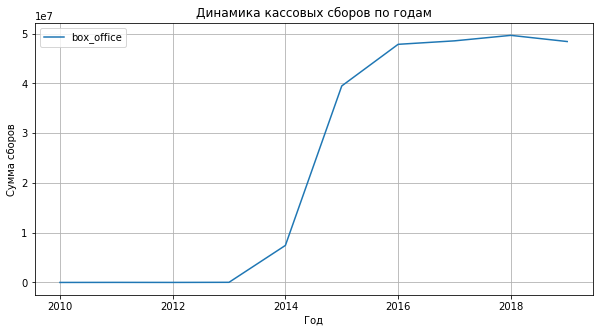

In [72]:
# сделаем сводную таблицу по году выхода фильма в прокат, посчитаем сумму сборов
df.query('box_office !=0').pivot_table(index='year_rental', values='box_office', aggfunc='sum').plot( grid=True, figsize=(10, 5))
plt.title('Динамика кассовых сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов')

##### Вывод

Из графика следует, что сумма сборов была минимальной в 2010 году,  максимальной в 2018 году. 

Большой процент пропусков в столбце box_office, говорит о том, что большая часть фильмов не выходила в кинотеатрах, но мы не можем исключить и то, что среди этих пропусков есть, просто утерянные данные. Поэтому данный график считать полностью достоверным не рекомендуется.

#### Посчитаем среднюю и медианную сумму сборов для каждого года.

In [73]:
# с помощью сводной таблицы посчитаем среднее и медиану за каждый год
df.pivot_table(index='year_rental', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year_rental,,
2010,23.130038,1.700000
2011,129.383165,3.000000
2012,54.417898,5.560000
2013,161.954925,3.522500
2014,26684.415266,18.160000
2015,84940.570315,4920.933000
2016,91173.533743,3915.041020
2017,136032.793326,9968.340000


##### Вывод

Из сводной таблицы можно заметить, что во всех годах среднее и медиана, даже после очистки выбивающихся значений очень сильно отличается. Это может говорить о том, что в каждом году есть успешные(с большим кассовым сбором) и провальные(c очень низким сбором) фильмы, и разница в цифрах может быть очень огромная. Если судить по медиане, то все таки больше фильмов с низким сбором, чем с высоким.

#### Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Посмотрим меняется ли картина в зависимости от года? 

Text(0, 0.5, 'Сумма сборов')

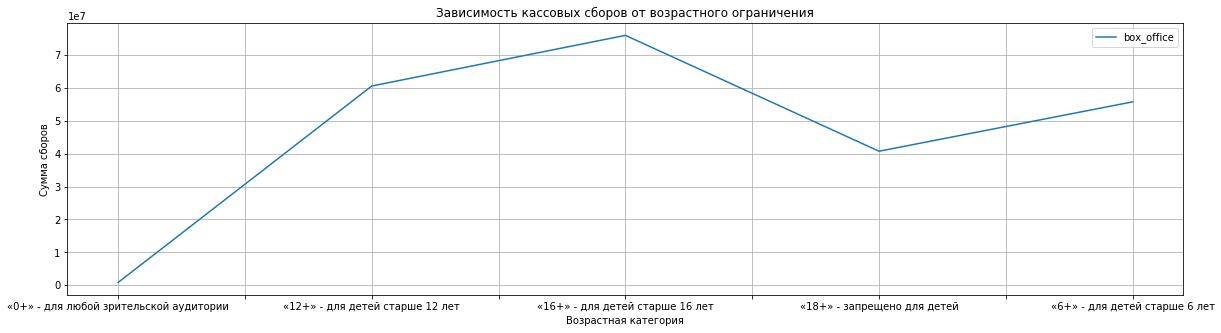

In [74]:
# построим график зависимости кассовых сборов от возрастного ограничения, в период с 2015 по 2019 года
(df[df['year_rental'].isin(('2015', '2016', '2017', '2018', '2019'))]
                             .pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
                             .plot( grid=True, figsize=(20, 5)))
plt.title('Зависимость кассовых сборов от возрастного ограничения')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма сборов')

##### Вывод

Из графика видно, что возрастное ограничение влияет на кассовые сборы. Больше всего денег собрали фильмы 16+. Это похоже на правду, так как взрослые люди и подростки ходят в кино чаще, и если они идут без детей, то скорее всего они пойдут на более взрослое кино.

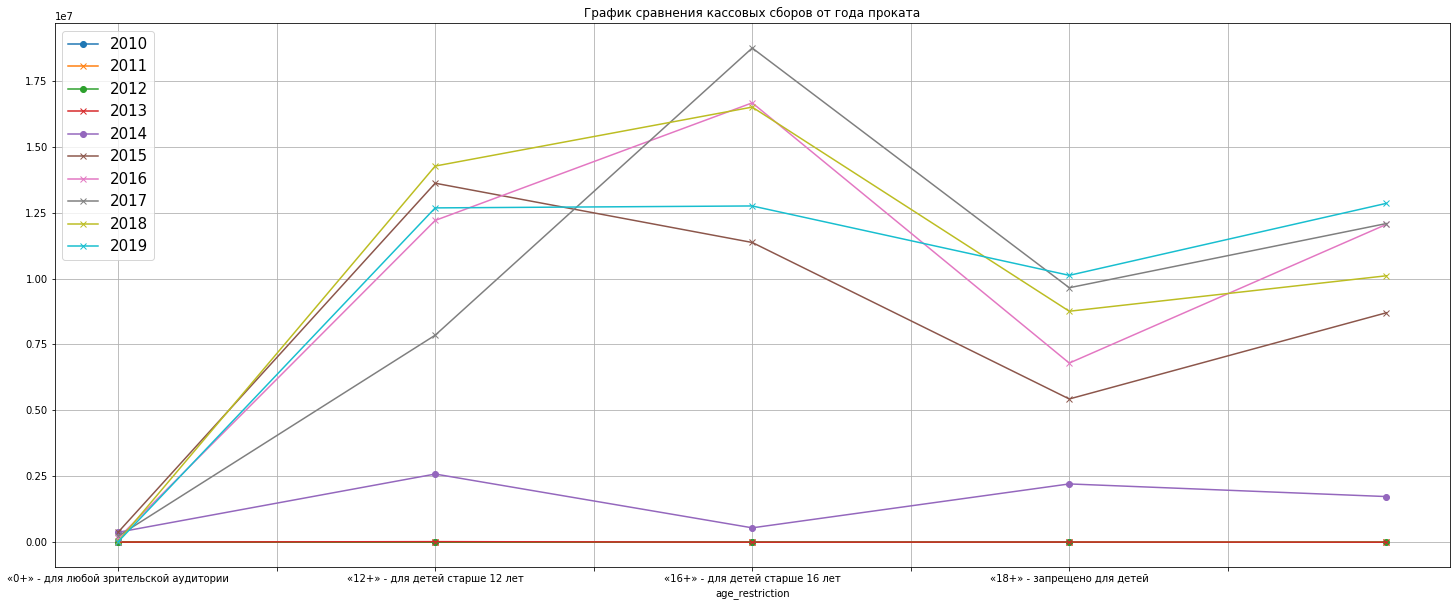

In [75]:
# построим график зависимости кассовых сборов от возрастного ограничения для каждого года отдельно и сравним их 
a = df.query('year_rental == 2010').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
b = df.query('year_rental == 2011').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
c = df.query('year_rental == 2012').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
d = df.query('year_rental == 2013').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
e = df.query('year_rental == 2014').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
f = df.query('year_rental == 2015').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
g = df.query('year_rental == 2016').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
h = df.query('year_rental == 2017').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
i = df.query('year_rental == 2018').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')
j = df.query('year_rental == 2019').pivot_table(index='age_restriction', values='box_office', aggfunc='sum')

plt.show()

ax = a.plot(y = 'box_office', grid=True, style='o-', label='2010', figsize=(15, 15), title='График сравнения кассовых сборов от года проката')
b.plot(y = 'box_office', grid=True, style='x-', ax=ax, label='2011', figsize=(25, 10), legend=True)
c.plot(y = 'box_office', grid=True, style='o-', ax=ax, label='2012', figsize=(25, 10), legend=True)
d.plot(y = 'box_office', grid=True, style='x-', ax=ax, label='2013', figsize=(25, 10), legend=True)
e.plot(y = 'box_office', grid=True, style='o-', ax=ax, label='2014', figsize=(25, 10), legend=True)
f.plot(y = 'box_office', grid=True, style='x-', ax=ax, label='2015', figsize=(25, 10), legend=True)
g.plot(y = 'box_office', grid=True, style='x-', ax=ax, label='2016', figsize=(25, 10), legend=True)
h.plot(y = 'box_office', grid=True, style='x-', ax=ax, label='2017', figsize=(25, 10), legend=True)
i.plot(y = 'box_office', grid=True, style='x-', ax=ax, label='2018', figsize=(25, 10), legend=True)
j.plot(y = 'box_office', grid=True, style='x-', ax=ax, label='2019', figsize=(25, 10), legend=True)

plt.legend(loc=2, prop={'size': 15})

##### Вывод

По объединенному графику видно, в 2019 году больше сборов собрали фильмы возрастной категории 6+, 12+, 16+.

В 2018 и 2016 годах больше собрали фильмы 16+.

В 2017 году с большим отрывом собрали фильмы 16+. 

В 2015 году больше кассовых сборов собрали фильмы 12+.

В 2014 году примерно наравне собрали больше сборов фильмы 12+ и 18+.

Во всех годах всех меньше собирают фильмы 0+.

Так как данных о сборах очень мало с 2010 по 2013 года, то графики почти горизонтальны и стремятся к нолю. Не уверена, что корректно было бы утверждать как сборы влияют от возрастного ограничения в эти периоды.

### Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Поиск интересных закономерностей

In [76]:
# создадим таблицу, куда включим только те фильмы, которым оказывалась гос. поддержка
state_support = df.query('(nonrefundable_support !=0) or (refundable_support !=0)')
state_support.sample(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,age_group,year_rental,director_one,genres_one,film_studio_one,production_country_one,producer_one,financing_source_one,ratio_support,sum_support
2541,Зеленая Карета,111009715,2015-06-01 12:00:00+00:00,Художественный,"ООО ""Пропеллер продакшн"", ООО ""Революция Фильм...",Россия,"С.Комаров, О.Асадулин","Р.Давлетьяров, А.Алькема, Г.Подземельный, В.Ма...",«16+» - для детей старше 16 лет,0.0,...,16,2015,С.Комаров,драма,"ООО ""Пропеллер продакшн""",Россия,Р.Давлетьяров,Министерство культуры,69,26950.0
3255,Время первых (2017),111001317,2017-02-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,75000.0,...,6,2017,Д.Киселев,приключения,"ООО ""ТаББаК""",Россия,Т.Бекмамбетов,Фонд кино,47,250000.0
6261,"ПАПА, СДОХНИ",111015018,2018-08-13 12:00:00+00:00,Художественный,"ООО ""Белое Зеркало, ООО ""Продюсерский центр ""П...",Россия,К.Соколов,С.Кикнавелидзе,«18+» - запрещено для детей,0.0,...,18,2018,К.Соколов,комедия,"ООО ""Белое Зеркало",Россия,С.Кикнавелидзе,Министерство культуры,55,25000.0
5921,Глубокие реки,111007518,2018-06-06 12:00:00+00:00,Художественный,"НФ ""Пример интонации (Фонд Александра Сокурова)""",Россия,В.Битоков,Н.Янкин,«16+» - для детей старше 16 лет,0.0,...,16,2018,В.Битоков,драма,"НФ ""Пример интонации (Фонд Александра Сокурова)""",Россия,Н.Янкин,Министерство культуры,66,25000.0
6823,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000.0,...,6,2019,Н.Лопато,мультфильм,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Фонд кино,100,180000.0


Text(0, 0.5, 'сумма гос. поддержка')

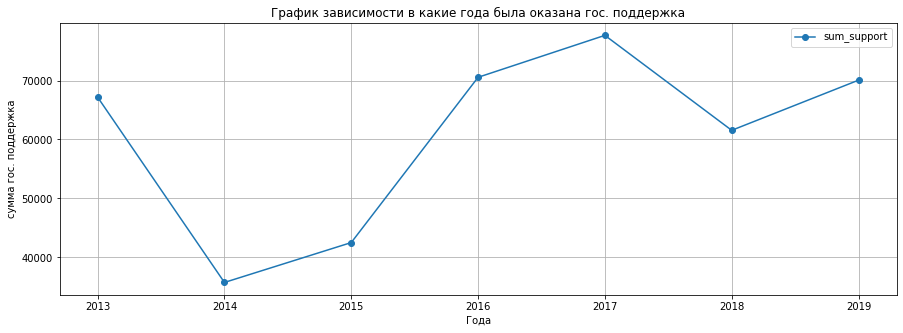

In [77]:
# посмотрим в какие года и в каком объеме оказывалась гос. поддержка нашего кино
(
 state_support.pivot_table(index='year_rental', values='sum_support')
              .plot(grid=True, style='o-', figsize=(15, 5))
)
plt.title('График зависимости в какие года была оказана гос. поддержка')
plt.xlabel('Года')
plt.ylabel('сумма гос. поддержка')

In [78]:
# посмотрим на какие жанры больше всего оказывается поддержка и в каком объеме 
(
state_support.pivot_table(index='genres', values='sum_support', aggfunc='sum')
             .sort_values(by='sum_support', ascending=False).head(10)
)    

,sum_support
genres,
драма,2341949.180
комедия,1229749.000
"комедия,мелодрама",704200.000
"мультфильм,комедия,приключения",560000.000
"история,биография,драма",500000.000
"фантастика,боевик",500000.000
unknown,481000.000
"драма,триллер,приключения",442104.482
"спорт,драма",440000.000


In [79]:
# соберем сводную таблицу по источникам финансирования и посмотрим более дательно кто и сколько финансирует
(
state_support.pivot_table(index='financing_source', values=['refundable_support']+['nonrefundable_support'], aggfunc='sum')
             .sort_values(by=['refundable_support']+['nonrefundable_support'], ascending=False).head(10)
) 

,nonrefundable_support,refundable_support
financing_source,,
Фонд кино,1.056510e+07,3613500.0
"Министерство культуры, Фонд кино",8.599314e+05,325500.0
Министерство культуры,4.836661e+06,0.0


##### Вывод

* Фильмы начали получать гос. финансирование только с 2013 года

* Большую часть финансирования, возвращать не надо.

* В 2017 году было выделено больше всего средств на поддержку кино.

* Всех меньше средств было выделено в 2014 году.

* Больше всего поддерживаются государством фильмы в жанрах - комедия и драма.

* Министерство культуру финансирует фильмы, не требуя возврата.


#### Просмотреть, сколько средств выделяют на поддержку кино

In [80]:
# посмотрим кукую долю выделяют средств для поддержки кино, при помощи сводной таблицы 
state_support.pivot_table(index=['year_rental'], values='ratio_support', aggfunc=['mean', 'median'])

,mean,median
,ratio_support,ratio_support
year_rental,,
2013,47.000000,47.0
2014,54.750000,57.5
2015,55.744186,62.0
2016,56.983607,64.0
2017,50.146341,52.0
2018,54.000000,59.0
2019,51.557143,58.5


Text(0, 0.5, 'доля гос. поддержка')

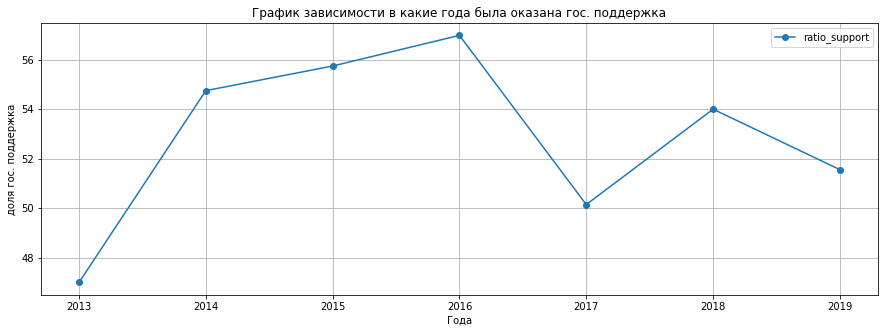

In [81]:
# посмотрим в какие года и какую долю составляет гос. поддержка нашего кино
(
 state_support.pivot_table(index='year_rental', values=['ratio_support'])
              .plot(grid=True, style='o-', figsize=(15, 5))
)
plt.title('График зависимости в какие года была оказана гос. поддержка')
plt.xlabel('Года')
plt.ylabel('доля гос. поддержка')

##### Вывод

График наглядно показывает, что рост поддержки нарастал с 2013 по 2016, далее пошел на спад. Самою большую долю выделяли в 2016 году.

Самый маленькая доля от общего бюджета фильмов, выделялась в 2017 году, но в рублевом отношении это был самым удачным годом для фильмов, получивших поддержку. 

#### Проверка, хорошо ли окупаются такие фильмы, какой у них рейтинг

In [82]:
# при помощи функции добавим столбец в таблицу state_support, где фигурируют фильмы только с гос. поддержкой
# в столбце будет отражаться окупился фильм или нет, определим это по разности кассовых сборов и общего бюджета
def payback(row):

    box_office = row['box_office']
    budget = row['budget']  
    
    if (box_office-budget) > 0:  
        return 'фильм окупился' 
    if (box_office-budget) < 0:   
        return 'фильм не окупился'

state_support['payback'] = state_support.apply(payback, axis=1)
state_support.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,year_rental,director_one,genres_one,film_studio_one,production_country_one,producer_one,financing_source_one,ratio_support,sum_support,payback
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,2013,А.Атанесян,драма,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,Министерство культуры,33,26500.000,фильм не окупился
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,2014,А.Якимчук,unknown,"ООО ""Компания ""АТК-Студио""",Россия,А.Тютрюмов,Министерство культуры,70,26000.000,фильм не окупился
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,2013,Р.Давлетьяров,комедия,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,Р.Давлетьяров,Фонд кино,61,107847.945,фильм не окупился
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"ООО ""Студия ""Пассажир""",Россия,Л.Антонова,Министерство культуры,69,28000.000,фильм не окупился
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,2014,М.Угаров,драма,"ООО ""Студия ""Пассажир""",Россия,А.Миндадзе,Министерство культуры,62,25000.000,фильм не окупился


In [83]:
# посмотрим при помощи группировки таблицы по столбцу payback, какое количество окупилось и какое нет
state_support.groupby('payback')['type'].count() 

payback
фильм не окупился    238
фильм окупился        80
Name: type, dtype: int64

In [84]:
# создадим сводную таблицу и посмотрим средний рейтинг фильмов, которые окупились и не окупились
state_support.query('ratings != 0').pivot_table(index=['payback'], values='ratings')

,ratings
payback,
фильм не окупился,6.008482
фильм окупился,6.054430


In [85]:
# посмотрим средний рейтинг фильмов без гос. поддержки
df.query('sum_support == 0')['ratings'].mean()

5.6599775470109455

In [86]:
# посмотрим средний рейтинг фильмов с гос. поддержки
df.query('sum_support != 0')['ratings'].mean()

5.730722891566265

##### Вывод

Добавив столбец с категорией окупился или нет фильм, и посчитав количесто в каждой категории,наглядно видно, что неокупившихся фильмов примерно 75%. То есть, в большинстве случаев, все то, что гос. поддержка посчитала нужным финансировать, оказалось убыточным.

Интересная закономерность в том, что фильмы не окупившиеся и окупившиеся имеют в среднем почти одинаковый рейтинг.

По среднему рейтингу фильмов с поддержкой и без, можно сказать, что фильмы успешные и провальные встречаются и там и там. 

### Общий вывод

I. Предобработка данных:

* были удаленны пропуски, состаляющие менее 1%, в столбцах film_studio, production_country и director;

* для удобства чтения таблицы все суммы из рублей были переведены в тыс. рублей;

* явных дубликатов, выявленно не было, был выделен один неявный дубликат одного и того же фильма, один из них был удален;

* были добавленны столбцы к таблице с данными: 
   * year_rental	
   * director_one
   * genres_one	
   * film_studio_one
   * production_country_one
   * producer_one
   * financing_source_one
   * ratio_support	
   * sum_support	
   * payback

* значения с столбце общего бюджета, которые были меньше гос. поддержки, были откорректированы. 

II. Исследовательский анализ данных:

О выпущенных фильмах с 2010 по 2019 года, можно сделать следующие выводы:

* Всех больше фильмов вышло в прокат в кинотеатрах в 2019 году. Всех меньше вышло в 2010 году.

* Данные о сборах в кинотеатрах составляют 42,3% от общего числа. Что говорит о том, что меньше половины всех фильмов выходят в кинотеатрах.

* Сумма сборов была минимальной в 2010 году, максимальной в 2018 году.

* Большой процент пропусков в столбце box_office, говорит о том, что большая часть фильмов не выходила в кинотеатрах, но мы не можем исключить и то, что среди этих пропусков есть, просто утерянные данные. Поэтому  считать полученные данные полностью достоверным не рекомендуется.

* Возрастное ограничение влияет на кассовые сборы. Больше всего денег собрали фильмы 16+. За период с 2015 по 2019 года.

* Если расматривать каждый год в отдельности, то:

   - В 2019 году больше сборов собрали фильмы возрастной категории 6+, 12+, 16+.

   - В 2018 и 2016 годах больше собрали фильмы 16+.

   - В 2017 году с большим отрывом собрали фильмы 16+. 
   
   - В 2015 году больше кассовых сборов собрали фильмы 12+.
   
   - В 2014 году примерно наравне собрали больше сборов фильмы 12+ и 18+.
    
   - Во всех годах всех меньше собирают фильмы 0+.
   
   - В период с 2010 по 2013 года данных о выпущенных фильмах мало, за данный период сложно утверждать как сборы влияют от возрастного ограничения в эти периоды.
   
* Рост поддержки нарастал с 2013 по 2016, далее пошел на спад. Самою большую долю выделяли в 2016 году.

* Самый маленькая доля от общего бюджета фильмов, выделялась в 2017 году, но в рублевом отношении это был самым удачным годом для фильмов, получивших поддержку. 

* Неокупившихся фильмов почти 75%. То есть, в большинстве случаев, все то, что гос. поддержка посчитала нужным финансировать, оказалось убыточным.

* Интересная закономерность в том, что фильмы не окупившиеся и окупившиеся имеют примерно одинаковый средний рейтинг.

* По среднему рейтингу фильмов с поддержкой и без, можно сказать, что фильмы успешные и провальные встречаются и там и там. 